# Description:
In this notebook the some of the properties of the antennas as simulated by NuRadioReco are investigated as a result of weird behaviour seen in simulation results.

https://github.com/telegraphic/pygdsm/blob/master/docs/pygdsm_quickstart.ipynb

In [1]:
import pygdsm
import astropy
import healpy as hp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#from healpy.newvisufunc import projview, newprojplot

In [2]:
gsm = pygdsm.gsm16.GlobalSkyModel16(freq_unit='MHz')
freq=160
radio_sky=gsm.generate(freq)
print("Percentage of pixels with negative noise temps: " +str(np.round((100*len(np.where(radio_sky < 0)[0])/len(radio_sky)),2))+"%" )

Percentage of pixels with negative noise temps: 0.0%


In [3]:
n_side=2**6
print('n_side:',n_side)
radio_sky = hp.pixelfunc.ud_grade(radio_sky, n_side)

n_side: 64


/tmp/ipykernel_18143/509087546.py:1: RuntimeWarning: invalid value encountered in log2
  hp.mollview(np.log2(radio_sky), coord='G', title='Test')


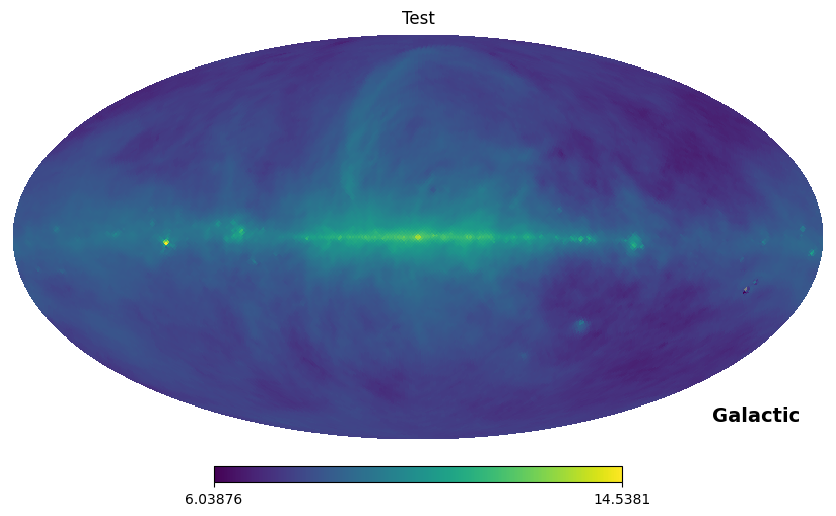

In [4]:
hp.mollview(np.log2(radio_sky), coord='G', title='Test')

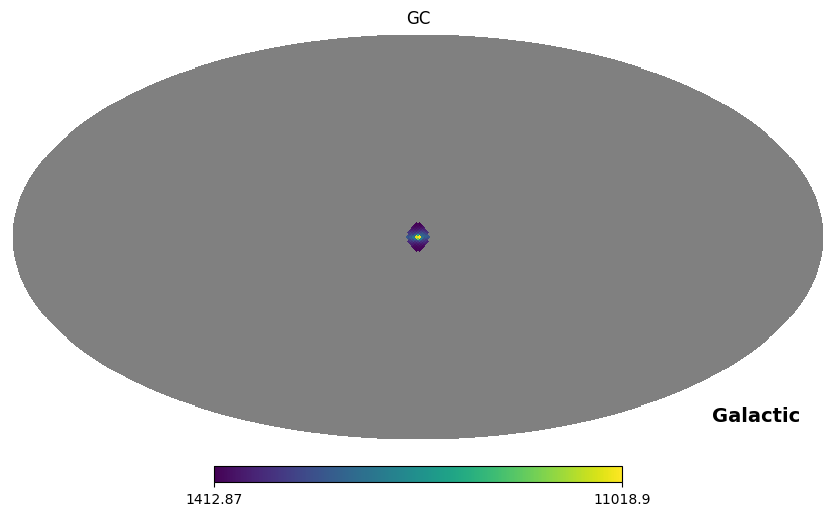

In [4]:
#n_side=int(np.sqrt(len(radio_sky)/12))
pixel_longitudes, pixel_latitudes = hp.pixelfunc.pix2ang(n_side, range(hp.pixelfunc.nside2npix(n_side)), lonlat=True)
galactic_coordinates = astropy.coordinates.Galactic(l=pixel_longitudes*(np.pi/180) * astropy.units.rad, 
                                                                b=pixel_latitudes*(np.pi/180) * astropy.units.rad)
AngMagC=np.array([((gc.l.deg+180)%360 -180)**2 + gc.b.deg**2 for gc in galactic_coordinates])
#radio_sky=np.ma.masked_where(AngMag<200, radio_sky, copy=True)
radio_sky_center = np.where(AngMagC>25, np.nan, radio_sky)
hp.mollview(radio_sky_center, coord='G', title='GC')

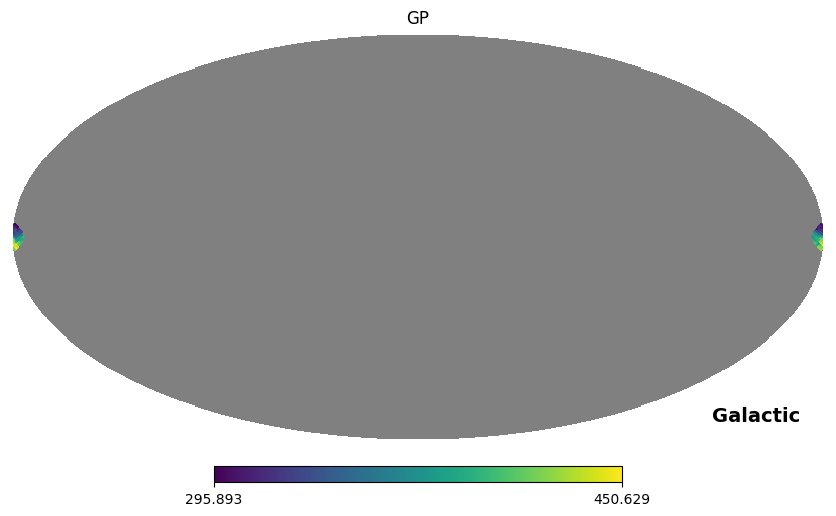

In [6]:
AngMagP=np.array([(gc.l.deg-180)**2 + gc.b.deg**2 for gc in galactic_coordinates])
radio_sky_pole = np.where(AngMagP>25, np.nan, radio_sky)
hp.mollview(radio_sky_pole, coord='G', title='GP')

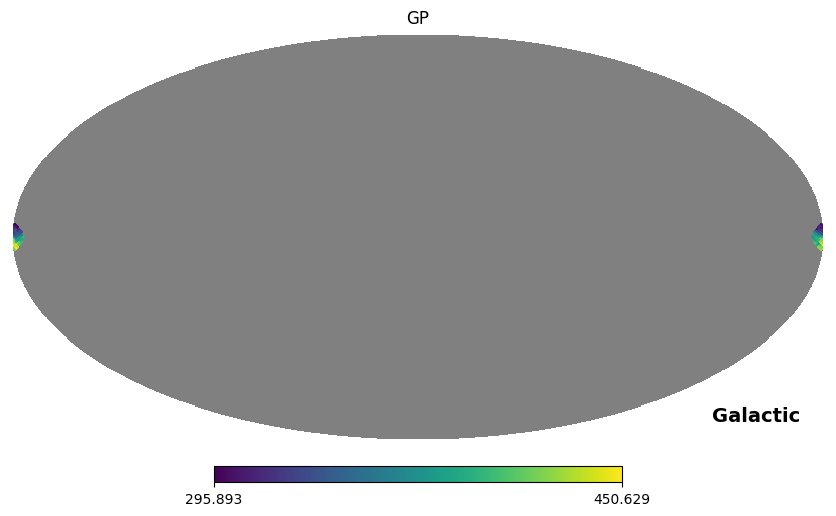

In [6]:
AngMagP=np.array([(gc.l.deg-180)**2 + gc.b.deg**2 for gc in galactic_coordinates])
radio_sky_pole = np.where(AngMagP>25, np.nan, radio_sky)
hp.mollview(radio_sky_pole, coord='G', title='GP')

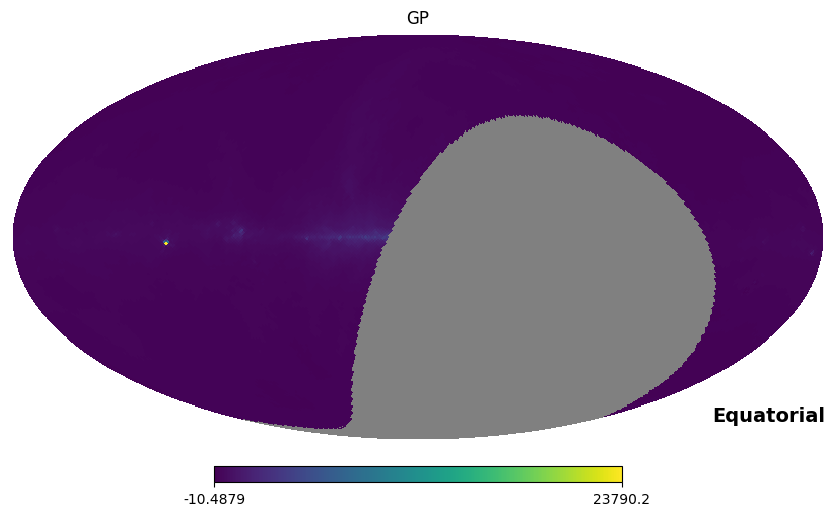

In [12]:
FOVDecLimit=(72+ 34/60)-90
galactic_coordinates = astropy.coordinates.Galactic(l=pixel_longitudes*(np.pi/180) * astropy.units.rad, 
                                                                b=pixel_latitudes*(np.pi/180) * astropy.units.rad)
ICRS_coordinates = galactic_coordinates.transform_to(astropy.coordinates.SkyCoord(ra=0*astropy.units.degree, 
                                                                                  dec=0*astropy.units.degree, frame='icrs'))#astropy.coordinates.ICRS)
Decs=np.array([ICRS_coordinates[i].dec.degree for i in range(len(ICRS_coordinates))])
radio_sky_FOV=np.where(Decs<FOVDecLimit, np.nan, radio_sky)
hp.mollview(radio_sky_FOV, coord='C', title='FOV')

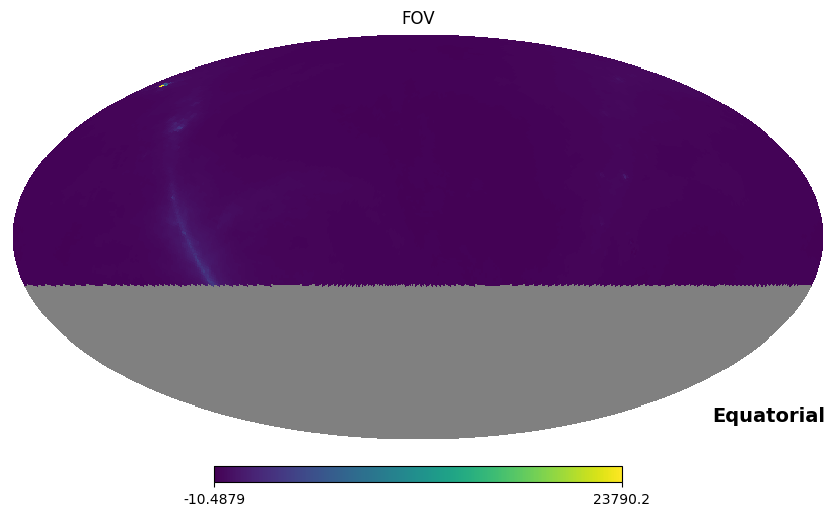

In [17]:
hp.mollview(radio_sky_FOV, coord='GC', title='FOV',rot=(180,0,0))

# Histogram of temps

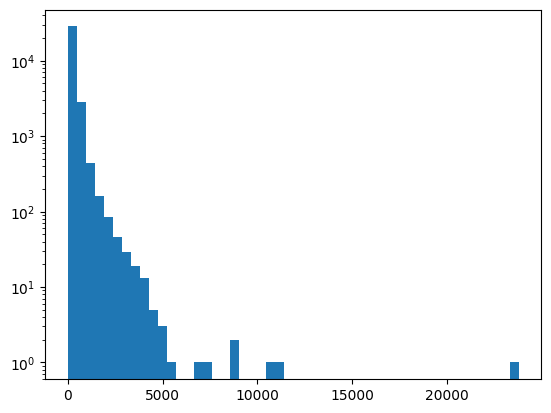

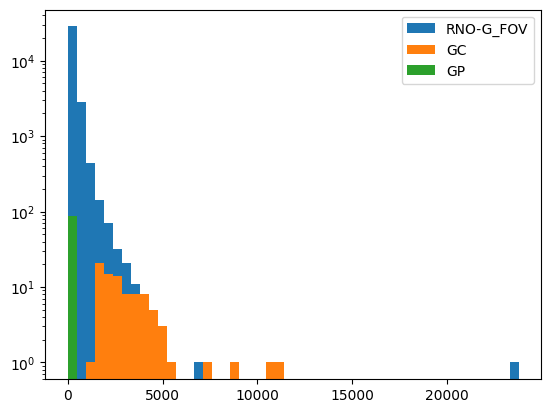

In [19]:
RefHist=plt.hist(np.concat((radio_sky_center,radio_sky_pole,radio_sky_FOV)),bins=50,log=True,label='GC')

plt.figure()
plt.hist(radio_sky_FOV,bins=RefHist[1],log=True,label='RNO-G_FOV')
plt.hist(radio_sky_center,bins=RefHist[1],log=True,label='GC')
plt.hist(radio_sky_pole,bins=RefHist[1],log=True,label='GP')
plt.legend()
plt.savefig("Figures/GNAETempFigs/Hists" + str(freq) + "MHz.png", format="png",bbox_inches='tight')
plt.show()

# Remake AE noise temp plot

In [2]:
import pygdsm
import astropy
import healpy as hp
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


n_side=2**6
n_side=2**4

# gsm = pygdsm.gsm08.GlobalSkyModel(freq_unit='MHz')
gsm = pygdsm.gsm16.GlobalSkyModel16(freq_unit='MHz')
radio_sky=gsm.generate(160)

radio_sky = hp.pixelfunc.ud_grade(radio_sky, n_side)
pixel_longitudes, pixel_latitudes = hp.pixelfunc.pix2ang(n_side, range(hp.pixelfunc.nside2npix(n_side)), lonlat=True)
galactic_coordinates = astropy.coordinates.Galactic(l=pixel_longitudes*(np.pi/180) * astropy.units.rad, 
                                                                    b=pixel_latitudes*(np.pi/180) * astropy.units.rad)
AngMagC=np.array([((gc.l.deg+180)%360 -180)**2 + gc.b.deg**2 for gc in galactic_coordinates])
AngMagP=np.array([(gc.l.deg-180)**2 + gc.b.deg**2 for gc in galactic_coordinates])

FOVDecLimit=(72+ 34/60)-90
galactic_coordinates = astropy.coordinates.Galactic(l=pixel_longitudes*(np.pi/180) * astropy.units.rad, 
                                                                    b=pixel_latitudes*(np.pi/180) * astropy.units.rad)
ICRS_coordinates = galactic_coordinates.transform_to(astropy.coordinates.SkyCoord(ra=0*astropy.units.degree, 
                                                                                      dec=0*astropy.units.degree, frame='icrs'))#astropy.coordinates.ICRS)
Decs=np.array([ICRS_coordinates[i].dec.degree for i in range(len(ICRS_coordinates))])

In [3]:
freqs=np.arange(50, 170, 10)
TCenter=np.zeros((len(freqs),np.sum(np.where(AngMagC>25, 0, 1))))
TPole=np.zeros((len(freqs),np.sum(np.where(AngMagP>25, 0, 1))))
TFOV=np.zeros((len(freqs),np.sum(np.where(Decs<FOVDecLimit, 0, 1))))
#TPole=np.zeros((len(freqs),len(np.where(AngMagP>25, np.nan, radio_sky)[~np.isnan(radio_sky_pole)])))
#TFOV=np.zeros((len(freqs),len(np.where(Decs<FOVDecLimit, np.nan, radio_sky)[~np.isnan(radio_sky_center)])))
for i,freq in enumerate(freqs):
    radio_sky=gsm.generate(freq)
    radio_sky = hp.pixelfunc.ud_grade(radio_sky, n_side)
    radio_sky_center = np.where(AngMagC>25, np.nan, radio_sky)
    radio_sky_pole = np.where(AngMagP>25, np.nan, radio_sky)
    radio_sky_FOV=np.where(Decs<FOVDecLimit, np.nan, radio_sky)
    radio_sky_center=radio_sky_center[~np.isnan(radio_sky_center)]
    radio_sky_pole=radio_sky_pole[~np.isnan(radio_sky_pole)]
    radio_sky_FOV=radio_sky_FOV[~np.isnan(radio_sky_FOV)]
    TCenter[i]=radio_sky_center
    TPole[i]=radio_sky_pole
    TFOV[i]=radio_sky_FOV

    #del radio_sky,radio_sky_center,radio_sky_pole,radio_sky_FOV



In [4]:
Colors=[
'#040c06',
'#112318',
'#1e3a29',
'#305d42',
'#4d8061',
'#89a257',
'#bedc7f',
'#eeffcc',
] # AMMO-8 palette from https://lospec.com/palette-list/ammo-8

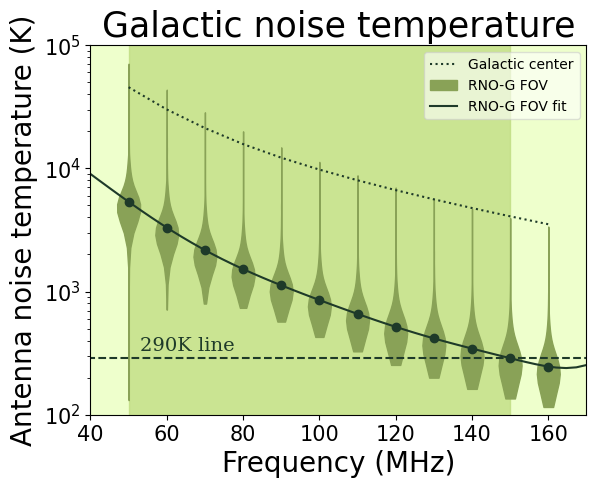

In [5]:
freqRangeAnalysis=(50,150)
freqRange=(40,170)
TempRange=(1e2,1e5)
TTemp=290


plt.figure()
ax=plt.gca()
ax.add_patch(mpl.patches.Rectangle((freqRange[0],0), freqRange[1]-freqRange[0], 1e5,color=Colors[7],alpha=1))
ax.add_patch(mpl.patches.Rectangle((freqRangeAnalysis[0],0), freqRangeAnalysis[1]-freqRangeAnalysis[0], 1e5,color=Colors[6],alpha=0.75))
plt.plot(freqs,np.median(TCenter,axis=1),label='Galactic center',c=Colors[2],alpha=1,linestyle='dotted')
plt.hlines(TTemp, 0, 200, colors=Colors[2], linestyles='--',alpha=1)
violin_parts = plt.violinplot(dataset=TFOV.tolist(),positions=freqs,widths=0.6*(freqs[1]-freqs[0]),
                              vert=True,showextrema=False,showmedians=False)

coef=np.polyfit(freqs,np.median(TFOV,axis=1), 7)
xfit=np.linspace(freqRange[0],freqRange[1],50)
p=np.poly1d(coef)
yfit=p(xfit)
plt.plot(xfit,yfit,label='RNO-G FOV fit',color=Colors[2],alpha=1)
plt.scatter(freqs,np.median(TFOV,axis=1),color=Colors[2],alpha=1)

for pc in violin_parts['bodies']:
    pc.set_color(Colors[5])
    pc.set_alpha(1)
    #pc.set_facecolor('red')
    #pc.set_edgecolor('black')
violin_parts['bodies'][0].set_label('RNO-G FOV')

ax.text(0.1, 0.21, f'{TTemp}K line', transform=ax.transAxes, fontsize=14,
        verticalalignment='top',alpha=1,fontfamily="serif",color=Colors[2])

plt.ylim(*TempRange)
plt.xlim(*freqRange)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.title('Galactic noise temperature',fontsize=25)
plt.xlabel('Frequency (MHz)',fontsize=20)
plt.ylabel('Antenna noise temperature (K)',fontsize=20)
plt.legend(framealpha=0.6)
plt.savefig("Figures/GNAETempFigs/GalacticNoiseTemp.png", format="png",bbox_inches='tight')
plt.show()

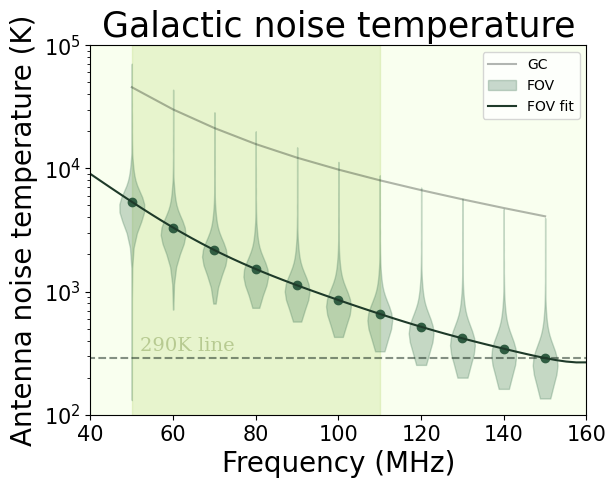

In [132]:
freqRangeAnalysis=(50,110)
freqRange=(40,160)
TempRange=(1e2,1e5)
TTemp=290


plt.figure()
ax=plt.gca()
ax.add_patch(mpl.patches.Rectangle((freqRange[0],0), freqRange[1]-freqRange[0], 1e5,color=Colors[7],alpha=0.3))
ax.add_patch(mpl.patches.Rectangle((freqRangeAnalysis[0],0), freqRangeAnalysis[1]-freqRangeAnalysis[0], 1e5,color=Colors[6],alpha=0.3))
plt.plot(freqs,np.median(TCenter,axis=1),label=labels[0][1],c=Colors[0],alpha=0.3)
plt.hlines(TTemp, 0, 200, colors=Colors[1], linestyles='--',alpha=0.5)
violin_parts = plt.violinplot(dataset=TFOV.tolist(),positions=freqs,widths=0.6*(freqs[1]-freqs[0]),
                              vert=True,showextrema=False,showmedians=False)

coef=np.polyfit(freqs,np.median(TFOV,axis=1), 6)
xfit=np.linspace(freqRange[0],freqRange[1],50)
p=np.poly1d(coef)
yfit=p(xfit)
plt.plot(xfit,yfit,label='FOV fit',color=Colors[2])
plt.scatter(freqs,np.median(TFOV,axis=1),color=Colors[3])

for pc in violin_parts['bodies']:
    pc.set_color(Colors[4])
    pc.set_alpha(0.3)
    #pc.set_facecolor('red')
    #pc.set_edgecolor('black')
violin_parts['bodies'][0].set_label('FOV')

ax.text(0.1, 0.21, f'{TTemp}K line', transform=ax.transAxes, fontsize=14,
        verticalalignment='top',alpha=0.5,fontfamily="serif",color=Colors[5])

plt.ylim(*TempRange)
plt.xlim(*freqRange)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.title('Galactic noise temperature',fontsize=25)
plt.xlabel('Frequency (MHz)',fontsize=20)
plt.ylabel('Antenna noise temperature (K)',fontsize=20)
plt.legend()
plt.show()